In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pygmt
from datetime import datetime, timezone
import os
import sys

# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.processing import TrainTestSplit as split

In [2]:
data_path = '../data'
ev_cat = pd.read_csv(f'{data_path}/catalogs/yellowstone.events.2024.csv')
arr_cat = pd.read_csv(f'{data_path}/catalogs/yellowstone.arrivals.gains.2024.csv')
ypml_cat = pd.read_csv(f'{data_path}/catalogs/yellowstone.events.ypml-v5.2024.csv')
ypml_amps = pd.read_csv(f'{data_path}/catalogs/yellowstone.amps.ypml-v5.2024.csv')
p_feats = pd.read_csv(f'{data_path}/features/p_features.2024.csv')
s_feats = pd.read_csv(f'{data_path}/features/s_features.2024.csv')

In [3]:
ev_cat['event_lon'].describe()

count    21075.000000
mean      -110.806796
std          0.258270
min       -111.331667
25%       -111.014167
50%       -110.813667
75%       -110.673167
max       -109.753333
Name: event_lon, dtype: float64

# Describe the feature catalogs

In [4]:
split.print_feature_df_event_counts(p_feats, "P", ypml_cat)

There are 7996 events and 92295 arrivals in the P feature catalog between 2012-10-07 00:32:04.740000+00:00 and 2023-12-29 09:38:37.689999+00:00


In [5]:
split.print_feature_df_event_counts(s_feats, "S", ypml_cat)

There are 7017 events and 18179 arrivals in the S feature catalog between 2012-10-07 00:32:04.740000+00:00 and 2023-12-29 09:38:37.689999+00:00


In [6]:
p_feats[~p_feats['event_identifier'].isin(ypml_cat['Evid'])]

,event_identifier,arrival_identifier,network,station,channel,location_code,source_latitude,source_longitude,source_receiver_distance_km,source_receiver_back_azimuth,...,avg_noise_14.00,avg_signal_14.00,avg_noise_15.00,avg_signal_15.00,avg_noise_16.00,avg_signal_16.00,avg_noise_17.00,avg_signal_17.00,avg_noise_18.00,avg_signal_18.00
27855,60408292,10575122,WY,YMS,EHZ,1,44.324833,-110.537167,6.800621,353.712696,...,0.003389,0.150573,0.002909,0.119775,0.002450,0.094578,0.002036,0.074574,0.001679,0.058954
27856,60408292,10575127,WY,YLT,EHZ,1,44.324833,-110.537167,13.105718,161.977253,...,0.000484,0.043079,0.000382,0.033142,0.000305,0.025678,0.000245,0.020071,0.000197,0.015839
27857,60408292,10575131,WY,YLA,EHZ,1,44.324833,-110.537167,29.880559,225.787811,...,0.000136,0.005872,0.000115,0.004525,0.000097,0.003500,0.000081,0.002723,0.000067,0.002136
27858,60408292,10575132,WY,MCID,EHZ,1,44.324833,-110.537167,53.670805,73.606143,...,0.000185,0.001779,0.000144,0.001384,0.000112,0.001083,0.000088,0.000854,0.000070,0.000679
74801,60408292,10575125,WY,YDD,HHZ,1,44.324833,-110.537167,8.405203,158.257549,...,0.007189,0.682729,0.005965,0.657198,0.005080,0.632004,0.004462,0.597486,0.004035,0.552900
74802,60408292,10575128,WY,YTP,HHZ,1,44.324833,-110.537167,21.437371,249.767577,...,0.000823,0.025475,0.000743,0.022279,0.000710,0.019660,0.000684,0.017502,0.000651,0.015649
74803,60408292,10575130,WY,YPP,HHZ,1,44.324833,-110.537167,22.156948,74.243825,...,0.000883,0.121959,0.001091,0.112158,0.001255,0.102130,0.001356,0.093836,0.001402,0.086661


In [7]:
s_feats[~s_feats['event_identifier'].isin(ypml_cat['Evid'])]

,event_identifier,arrival_identifier,network,station,channel1,channel2,location_code,source_latitude,source_longitude,source_receiver_distance_km,...,radial_avg_noise_16.00,radial_avg_signal_16.00,transverse_avg_noise_17.00,transverse_avg_signal_17.00,radial_avg_noise_17.00,radial_avg_signal_17.00,transverse_avg_noise_18.00,transverse_avg_signal_18.00,radial_avg_noise_18.00,radial_avg_signal_18.00
12097,60408292,10575126,WY,YDD,HHN,HHE,1,44.324833,-110.537167,8.405203,...,0.088273,0.790454,0.080542,0.970869,0.083408,0.68981,0.071742,0.862301,0.077962,0.598520
12098,60408292,10575129,WY,YTP,HHN,HHE,1,44.324833,-110.537167,21.437371,...,0.009260,0.045823,0.007834,0.045607,0.008362,0.04075,0.007218,0.041277,0.007580,0.036075


# Describe Event Catalogs

In [8]:
def describe_cat_cnts(cat_df, cat_name, ot_name='origin_time', cat_type='events'):
    print(f"There are {len(cat_df)} {cat_type} in the {cat_name} event catalog between \
{datetime.fromtimestamp(cat_df[ot_name].min(), tz=timezone.utc)} and \
{datetime.fromtimestamp(cat_df[ot_name].max(), tz=timezone.utc)}")
    
def describe_cat_ml_cnt(cat_df, cat_name, magtype_name='magnitude_type', cat_type='events'):
    print(f"There are {len(cat_df[cat_df[magtype_name] == 'l'])} {cat_type} with a preferred local magnitude in the {cat_name} event catalog")

def feat_percentage(featdf1, featdf2, phase, feat1_name):
    print(f"The {feat1_name} events make up {(len(featdf1)/(len(featdf1)+len(featdf2)))*100:0.2f}% of the {phase.upper()} feature dataset")

def print_value_counts(df, column_name, cat_name):
    print(f"The breakdown (%) of the {cat_name} {(df[column_name].value_counts()/len(df))*100}")

def time_filter(cat_df, start_datetime, end_datetime, ot_col_name):
    return cat_df[(cat_df[ot_col_name] >= start_datetime.timestamp()) & 
                    (cat_df[ot_col_name] < end_datetime.timestamp())]

In [9]:
describe_cat_cnts(ev_cat, "*full* YS")

There are 21075 events in the *full* YS event catalog between 2012-10-01 10:05:36.099998+00:00 and 2023-12-31 12:39:40.480000+00:00


In [10]:
describe_cat_cnts(ypml_cat, "YMPL", ot_name='EqOt')

There are 8475 events in the YMPL event catalog between 2012-10-07 00:32:04.740000+00:00 and 2023-12-29 09:38:37.689999+00:00


In [11]:
describe_cat_cnts(ev_cat[ev_cat['magnitude_type'] == 'l'], "*full* YS local mag")

There are 8476 events in the *full* YS local mag event catalog between 2012-10-07 00:32:04.740000+00:00 and 2023-12-29 09:38:37.689999+00:00


In [12]:
print(f"Event 60408292 \n in full YS cat: {np.any(ev_cat['evid'] == 60408292)} \n in YS ML cat: {np.any(ypml_cat['Evid'] == 60408292)}")

Event 60408292 
 in full YS cat: True 
 in YS ML cat: False


In [13]:
ev_cat[ev_cat['magnitude_type'] == 'w']

,evid,event_lat,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,utc
5539,60061837,44.772167,-110.684667,5.62,1.396183e+09,4.83,w,F,2014-03-30 12:34:39.160000+00:00


In [14]:
ev_cat[ev_cat['magnitude'] > -9]['magnitude'].describe()

count    20687.000000
mean         0.940888
std          0.654943
min         -1.410000
25%          0.490000
50%          0.870000
75%          1.370000
max          4.830000
Name: magnitude, dtype: float64

In [15]:
ev_cat[ev_cat['magnitude_type'] == 'l']['magnitude'].describe()

count    8476.000000
mean        1.409356
std         0.556107
min         0.010000
25%         0.990000
50%         1.370000
75%         1.740000
max         4.360000
Name: magnitude, dtype: float64

In [16]:
ev_cat[(ev_cat['magnitude_type'] == 'l') & (ev_cat['magnitude'] < 1.0)].sort_values('magnitude')

,evid,event_lat,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,utc
1672,60014499,44.660833,-110.756500,2.61,1.515725e+09,0.01,l,F,2018-01-12 02:41:04.370000+00:00
6893,60104782,44.644500,-111.013333,9.39,1.426623e+09,0.02,l,F,2015-03-17 20:16:48.820000+00:00
11312,60264947,44.660833,-110.754833,2.11,1.515725e+09,0.05,l,F,2018-01-12 02:38:11.480000+00:00
11313,60264952,44.653667,-110.751500,2.17,1.515725e+09,0.05,l,F,2018-01-12 02:40:03.650000+00:00
17976,60490002,44.741833,-111.061833,10.61,1.649588e+09,0.13,l,F,2022-04-10 10:54:22.609999+00:00
...,...,...,...,...,...,...,...,...,...
9572,60210707,44.751000,-110.995833,4.58,1.498974e+09,0.99,l,F,2017-07-02 05:33:21.789999+00:00
8474,60193087,44.790000,-110.994833,4.36,1.491713e+09,0.99,l,F,2017-04-09 04:42:43+00:00
14704,60393137,44.834167,-110.781333,3.67,1.591273e+09,0.99,l,F,2020-06-04 12:20:02.640000+00:00
15593,60430017,44.748667,-110.823167,5.88,1.616495e+09,0.99,l,F,2021-03-23 10:17:23.810000+00:00


In [17]:
ypml_cat['CatMag'].describe()

count    8475.000000
mean        1.409368
std         0.556139
min         0.010000
25%         0.990000
50%         1.370000
75%         1.740000
max         4.360000
Name: CatMag, dtype: float64

In [18]:
ypml_cat['Event-Mean-YPML-S'].describe()

count    8475.000000
mean        1.306131
std         0.563419
min        -0.339761
25%         0.906641
50%         1.250970
75%         1.628050
max         4.332082
Name: Event-Mean-YPML-S, dtype: float64

In [19]:
(ypml_cat['CatMag'] - ypml_cat['Event-Mean-YPML-S']).describe()

count    8475.000000
mean        0.103236
std         0.181879
min        -0.473797
25%        -0.010337
50%         0.082000
75%         0.169803
max         1.049101
dtype: float64

In [20]:
# The 4.8 is not in the local mag catalog
ypml_cat[(ypml_cat['EqOt'] > 1396137600.0) & (ypml_cat['EqOt'] < 1396224000.0)].sort_values('CatMag').iloc[-1:]

,Evid,EqLat,EqLon,EqDepSL,EqOt,CatMag,CatMagType,Date,Event-Mean-YPML,Event-Median-YPML,Event-Mean-YPML-S,Event-Median-YPML-S
103,60003995.0,44.7805,-110.721833,3.48,1.396192e+09,3.66,l,2014-03-30 15:12:24.330000+00:00,3.357628,3.325083,3.387239,3.316782


# Split the catalogs temporally 

In [21]:
startdate1 = datetime(2012, 10, 1, tzinfo=timezone.utc)
enddate1 = datetime(2023, 1, 1, tzinfo=timezone.utc)
startdate2 = datetime(2023, 1, 1, tzinfo=timezone.utc)
enddate2 = datetime(2024, 1, 1, tzinfo=timezone.utc)
print(f"Filter the other catalogs from {startdate1} to {enddate1} and from {startdate2} to {enddate2}")

Filter the other catalogs from 2012-10-01 00:00:00+00:00 to 2023-01-01 00:00:00+00:00 and from 2023-01-01 00:00:00+00:00 to 2024-01-01 00:00:00+00:00


In [22]:
# Catalogs pre enddate1
ev_cat_pre = time_filter(ev_cat, startdate1, enddate1, 'origin_time')
ypml_cat_pre = time_filter(ypml_cat, startdate1, enddate1, 'EqOt')
ypml_amps_pre = time_filter(ypml_amps, startdate1, enddate1, 'EqOt')
arr_cat_pre = time_filter(arr_cat, startdate1, enddate1, 'origin_time')

In [23]:
# Catalogs post enddate1
ev_cat_post = time_filter(ev_cat, startdate2, enddate2, 'origin_time')
ypml_cat_post = time_filter(ypml_cat, startdate2, enddate2, 'EqOt')
ypml_amps_post = time_filter(ypml_amps, startdate2, enddate2, 'EqOt')
arr_cat_post = time_filter(arr_cat, startdate2, enddate2, 'origin_time')

In [24]:
p_feats_pre = p_feats[p_feats.event_identifier.isin(ev_cat_pre.evid)]
s_feats_pre = s_feats[s_feats.event_identifier.isin(ev_cat_pre.evid)]

In [25]:
p_feats_post = p_feats[p_feats.event_identifier.isin(ev_cat_post.evid)]
s_feats_post = s_feats[s_feats.event_identifier.isin(ev_cat_post.evid)]

In [26]:
feat_percentage(p_feats_pre, p_feats_post, "P", '2023')
feat_percentage(s_feats_pre, s_feats_post, "S", '2023')

The 2023 events make up 93.30% of the P feature dataset
The 2023 events make up 92.96% of the S feature dataset


In [27]:
feat_percentage(p_feats_post, p_feats_pre, "P", '2023')
feat_percentage(s_feats_post, s_feats_pre, "S", '2023')

The 2023 events make up 6.70% of the P feature dataset
The 2023 events make up 7.04% of the S feature dataset


In [28]:
print_value_counts(ev_cat, 'magnitude_type', '*full* YS cat')
print("\n")
print_value_counts(ev_cat_pre, 'magnitude_type', 'Pre YS cat')
print("\n")
print_value_counts(ev_cat_post, 'magnitude_type', 'Post YS cat')

The breakdown (%) of the *full* YS cat magnitude_type
d    57.935943
l    40.218268
h     1.841044
w     0.004745
Name: count, dtype: float64


The breakdown (%) of the Pre YS cat magnitude_type
d    57.313065
l    40.791906
h     1.889893
w     0.005136
Name: count, dtype: float64


The breakdown (%) of the Post YS cat magnitude_type
d    65.502183
l    33.250156
h     1.247661
Name: count, dtype: float64


In [29]:
describe_cat_cnts(ev_cat_pre, "Pre-2023 YS")
describe_cat_cnts(ev_cat_post, "Post-2023 YS")

There are 19472 events in the Pre-2023 YS event catalog between 2012-10-01 10:05:36.099998+00:00 and 2022-12-30 16:36:52.549999+00:00
There are 1603 events in the Post-2023 YS event catalog between 2023-01-01 06:50:26.900000+00:00 and 2023-12-31 12:39:40.480000+00:00


In [30]:
describe_cat_cnts(ypml_cat_pre, "Pre-2023 YS",ot_name='EqOt')
describe_cat_cnts(ypml_cat_post, "Post-2023 YS",ot_name='EqOt')

There are 7942 events in the Pre-2023 YS event catalog between 2012-10-07 00:32:04.740000+00:00 and 2022-12-30 16:36:52.549999+00:00
There are 533 events in the Post-2023 YS event catalog between 2023-01-02 11:18:40.930000+00:00 and 2023-12-29 09:38:37.689999+00:00


# Describe arrivals

In [31]:
describe_cat_cnts(arr_cat, '*full* YS', cat_type='arrivals')

There are 266134 arrivals in the *full* YS event catalog between 2012-10-01 10:05:36.099998+00:00 and 2023-12-31 12:39:40.480000+00:00


In [32]:
describe_cat_cnts(arr_cat[arr_cat.magnitude_type == 'l'], '*full* YS', cat_type='arrivals')

There are 132902 arrivals in the *full* YS event catalog between 2012-10-07 00:32:04.740000+00:00 and 2023-12-29 09:38:37.689999+00:00


In [33]:
132902 /266134 

0.4993800115731173

In [34]:
print_value_counts(arr_cat, 'phase', '*full* YS cat')
print("\n")
print_value_counts(arr_cat[arr_cat['magnitude_type'] == 'l'], 'phase', 'time-filtered local mag YS cat')

The breakdown (%) of the *full* YS cat phase
P    79.140583
S    20.859417
Name: count, dtype: float64


The breakdown (%) of the time-filtered local mag YS cat phase
P    81.688763
S    18.311237
Name: count, dtype: float64


In [35]:
print_value_counts(arr_cat_pre, 'phase', 'pre-2023 YS cat')
print("\n")
print_value_counts(arr_cat_pre[arr_cat_pre['magnitude_type'] == 'l'], 'phase', 'pre-2023 local mag YS cat')

The breakdown (%) of the pre-2023 YS cat phase
P    79.163698
S    20.836302
Name: count, dtype: float64


The breakdown (%) of the pre-2023 local mag YS cat phase
P    81.672259
S    18.327741
Name: count, dtype: float64


In [36]:
print_value_counts(arr_cat_post, 'phase', 'post-2023 YS cat')
print("\n")
print_value_counts(arr_cat_post[arr_cat_post['magnitude_type'] == 'l'], 'phase', 'post-2023 local mag YS cat')

The breakdown (%) of the post-2023 YS cat phase
P    78.864046
S    21.135954
Name: count, dtype: float64


The breakdown (%) of the post-2023 local mag YS cat phase
P    81.917992
S    18.082008
Name: count, dtype: float64


In [37]:
ngb_dl_p = 137958
ngb_dl_s = 111896
print(f"The proportion of phase types in the 10-day deep learning catalog from Armstrong et al (2023) is \n \
P: {(ngb_dl_p/(ngb_dl_p+ngb_dl_s))*100:0.1f}% \n \
S: {(ngb_dl_s/(ngb_dl_p+ngb_dl_s))*100:0.1f}%")

The proportion of phase types in the 10-day deep learning catalog from Armstrong et al (2023) is 
 P: 55.2% 
 S: 44.8%


## Look into the stations that arrivals are picked at

In [38]:
stat_count = arr_cat[['network', 'station', 'channelz']].value_counts().reset_index()

In [39]:
print("The break down of networks in the arrival catalog:")
((arr_cat['network'].value_counts())/len(arr_cat))*100

The break down of networks in the arrival catalog:


network
WY    75.810306
PB    17.845521
IW     2.652423
US     1.446264
MB     1.179481
TA     1.009266
IE     0.042460
RC     0.012400
IM     0.001127
GS     0.000752
Name: count, dtype: float64

In [40]:
print("The break down of networks in the arrival catalog for local mag events:")
((arr_cat[arr_cat['magnitude_type'] == 'l']['network'].value_counts())/len(arr_cat[arr_cat['magnitude_type'] == 'l']))*100

The break down of networks in the arrival catalog for local mag events:


network
WY    75.828054
PB    17.443680
IW     2.087252
MB     1.908925
US     1.601180
TA     1.037607
IE     0.075243
RC     0.014296
IM     0.002257
GS     0.001505
Name: count, dtype: float64

In [41]:
print("Stations with more than 100 picks that are not in the WY or PB networks:")
stat_count[(stat_count['count'] > 100) & (~stat_count['network'].isin(['WY', 'PB']))]

Stations with more than 100 picks that are not in the WY or PB networks:


,network,station,channelz,count
23,IW,FLWY,BHZ,3902
25,US,LKWY,BHZ,3264
31,TA,H17A,BHZ,1567
32,MB,QLMT,EHZ,1560
38,IW,IMW,BHZ,1255
39,TA,H17A,HHZ,1119
42,IW,LOHW,BHZ,765
43,MB,TPMT,EHZ,737
48,IW,MOOW,BHZ,559
49,US,BOZ,BHZ,426


In [42]:
print(f"There are {stat_count.shape[0]} sensors in the YS arr catalog")

There are 90 sensors in the YS arr catalog


In [43]:
print(f"There are {stat_count[~stat_count['network'].isin(['IE', 'RC', 'GS', 'IM'])].shape[0]} sensors in the top 6 networks in the arr catalog")

There are 76 sensors in the top 6 networks in the arr catalog


In [44]:
print(f"There are {stat_count['station'].drop_duplicates().shape[0]} stations in the stations in the YS arr catalog")

There are 69 stations in the stations in the YS arr catalog


In [45]:
print(f"There are {stat_count[~stat_count['network'].isin(['IE', 'RC', 'GS', 'IM'])]['station'].drop_duplicates().shape[0]} stations in the top 6 networks in the arr catalog")

There are 57 stations in the top 6 networks in the arr catalog


In [46]:
print(f"There are {stat_count[stat_count['network'] == 'WY'].drop_duplicates('station').shape[0]} stations in the WY network")

There are 31 stations in the WY network


In [47]:
print(f"There are {stat_count[stat_count['network'] == 'WY'].drop_duplicates(['station', 'channelz']).shape[0]} sensors in the WY network")

There are 49 sensors in the WY network


In [48]:
print(f"There are {stat_count[stat_count['network'] == 'PB'].drop_duplicates('station').shape[0]} stations in the PB network")

There are 6 stations in the PB network


In [49]:
print(f"There are {stat_count[stat_count['network'] == 'PB'].drop_duplicates(['station', 'channelz']).shape[0]} sensors in the PB network")

There are 6 sensors in the PB network


# Summary catalog and dataset features

Map of all events from 2012/10/01 to 2024/01/01
- gray non-M_L events
- plot stations, highlight those that have corrections

In [50]:
ev_cat[['event_lon', 'event_lat']].describe().loc[['min', 'max']]

,event_lon,event_lat
min,-111.331667,44.000167
max,-109.753333,45.129000


In [51]:
ys_border = pd.read_csv(f"{data_path}/utahnet/yell.border.g", delimiter=" ", names=["Longitude", "Latitude"], dtype=np.float64)
caldera = pd.read_csv(f"{data_path}/utahnet/caldera.ys", sep="\s+", names=["Latitude", "Longitude"], dtype=np.float64)

caldera = caldera.drop(caldera[caldera["Longitude"]==0].index)
caldera = caldera[["Longitude", "Latitude"]]
caldera["Longitude"] = caldera["Longitude"]*-1
caldera.head()

# Northeast Corner	Southwest Corner
# 45.17º,-109.75º	44.00º,-111.50º
uuss_auth_box = [[-109.75, 45.17],[-109.75, 44.00],  [-111.3333, 44.00], [-111.3333, 45.17], [-109.75, 45.17]]

In [52]:
station_df = arr_cat[['network', 'station', 'receiver_lon', 'receiver_lat']].drop_duplicates('station')
print(station_df.shape[0])
station_df.head()

69


,network,station,receiver_lon,receiver_lat
0,WY,YDC,-111.23967,44.70950
1,WY,YHH,-110.85050,44.78833
2,WY,YMR,-110.96500,44.66867
3,WY,YHB,-111.19620,44.75080
5,PB,B207,-110.84850,44.61900


In [53]:
station_df['receiver_lat'].describe()[['min', 'max']]

min    42.64290
max    45.64817
Name: receiver_lat, dtype: float64

In [54]:
station_df['receiver_lon'].describe()[['min', 'max']]

min   -114.038580
max   -109.267303
Name: receiver_lon, dtype: float64

#TODO highlight stations with R58 corrections

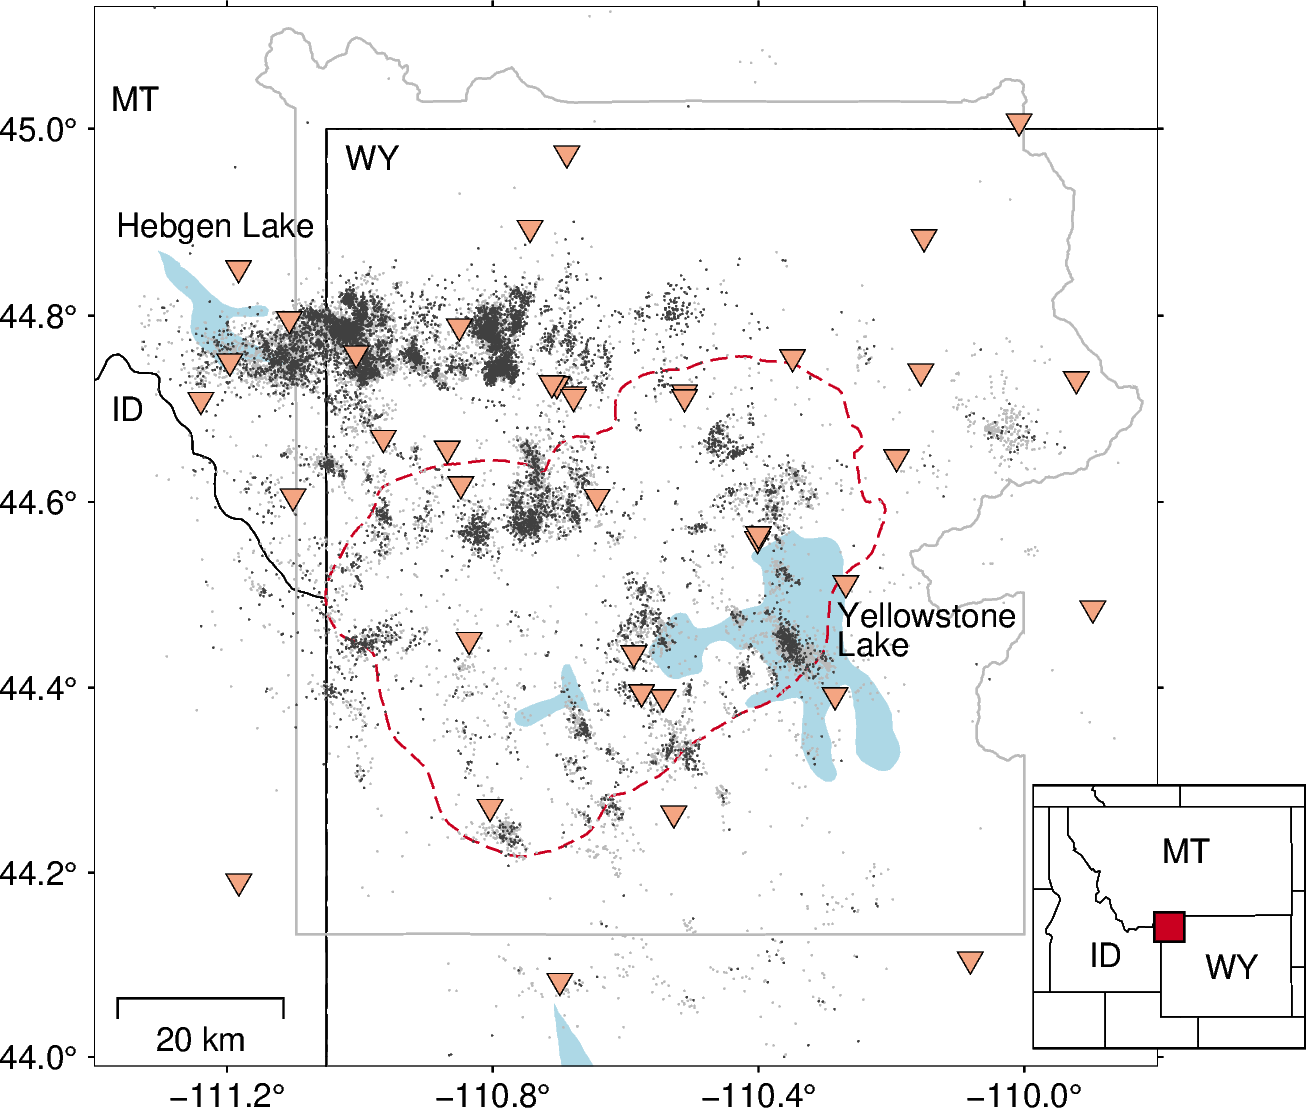

In [55]:
fig = pygmt.Figure()
pygmt.config(FORMAT_GEO_MAP="ddd.x")
pygmt.config(FONT="8p")

STUDYREG = np.array([-111.40, -109.80, 43.99, 45.13])
#STUDYREG = np.array([-114.40, -109.20, 42.5, 45.7])
projection = f"M5.4/9"


with pygmt.config(MAP_FRAME_TYPE="plain", MAP_FRAME_PEN="0.15p", MAP_TICK_LENGTH_PRIMARY="0.05c", 
                 FONT_TITLE="5p"):
    fig.coast(region=STUDYREG, projection=projection, water="lightblue", borders="2/0.3p")

    fig.basemap(region=STUDYREG, projection=projection, frame=["SenW+t", "xa0.4", "ya0.2"], 
               map_scale="jBL+w20k+o0.2c/0.4c")

#
# Plot utahnet boundaries
#
fig.plot(data=caldera, pen='0.5p,#ca0020,-')
fig.plot(data=ys_border, pen='0.5p,#bababa')
#fig.plot(data=uuss_auth_box, pen='0.5p,gray,-')

#
# Plot events
#
fig.plot(data=ev_cat[ev_cat['magnitude_type'] != 'l'][['event_lon', 'event_lat']], style='c0.5p', fill='#bababa')
fig.plot(data=ev_cat[ev_cat['magnitude_type'] == 'l'][['event_lon', 'event_lat']], style='c0.5p', fill='#404040')


#
# State labels, title, etc
#
fig.text(x=-111.375, y=45.0, text="MT", offset="0.0/0.25", justify="LM")
fig.text(x=-111.2, y=45.0, text="WY", offset="1.00/-0.25", justify="LM")
fig.text(x=-111.375, y=44.7, text="ID", justify="LM")

# fig.text(x=-111.25, y=44.88, text="Hebgen Lake", justify="CM", angle=-42, offset='-0.05c/-0.05c')
# fig.text(x=-110.2, y=44.40, text="Yellowstone Lake", justify="RM", angle=-73, offset='0.20c/-0.35c', fill='white')
fig.text(x=-111.2, y=44.9, text="Hebgen Lake", justify="CM", offset="-0.1/-0.02")
with open('ysl.txt', 'w') as fp:
    fp.write('''\
> -110.15 44.45 7p 0.1i l
Yellowstone Lake
''')
fig.text(textfiles='ysl.txt', M=True, offset='0.02c/0.1c')

#
#Plot stations
#
fig.plot(data=station_df[['receiver_lon', 'receiver_lat']], style='i0.25c', fill='#f4a582', pen='0.2p,black')


with fig.inset(position="jBR+o-1.25/0.15+w2.3c/2.23c", box="+p0.3,black+gwhite"):
    fig.coast(
        region = STUDYREG + np.array([-6.5, 6.5, -4.25, 4.6]),
        projection = f"M5.4/9/?",
        borders = [1, 2]
    )
    with pygmt.config(MAP_FRAME_TYPE="plain"):
        fig.basemap(frame=["nsew"])
        
    fig.plot(data=[[STUDYREG[0], STUDYREG[2], STUDYREG[1], STUDYREG[3]]], style="r+s", fill="#ca0020", pen="0.5p,black")

    fig.text(
        x = -107.25, 
        y = 43,
        text = "WY",
    )
    fig.text(
        x = -114, 
        y = 43.5, 
        text = "ID", 
    )
    fig.text(
        x = -109.7, 
        y = 47.4, 
        text = "MT", 
    )

fig.show()


Network magnitude vs station magnitude for local magnitudes 
- plot A) YP21
- plot B) UUSS

In [56]:
(ypml_amps['Event-Mean-YPML-S'] - ypml_amps['Station-YPML-S']).describe()

count    2.609800e+04
mean     1.805846e-18
std      1.660247e-01
min     -1.025347e+00
25%     -9.956507e-02
50%      3.127696e-03
75%      1.031450e-01
max      1.049844e+00
dtype: float64

In [57]:
SMALL_SIZE=8
MEDIUM_SIZE=9
LARGE_SIZE=9
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title
plt.rc('figure', labelsize=MEDIUM_SIZE)

0.16602147939501605
0.31709325002242483


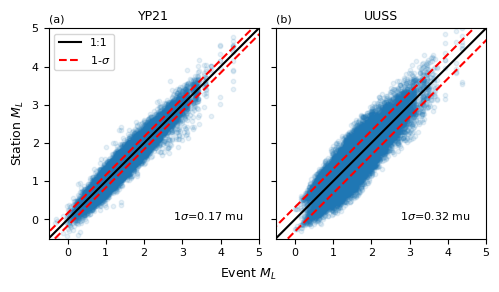

In [68]:
def plot_compare_net_stat_mags(df, title1, title2, sscale=1, outname=None):
    fig, ax = plt.subplots(1, 2,figsize=(5, 3))

    oneone= np.arange(-0.5, 5.5, 0.5)
    text_pos = (2.75, 0)
    lims = [-0.5, 5]
    xlabel1 = r'Event $M_L$'
    xlabel2 = r'Event $M_L$'
    ylabel = r'Station $M_L$'
    std_line_color = 'r'
    oneone_line_color = 'k'
    circle_color = 'C0'
    circle_alpha=0.1
    circle_size = 10

    def plot_box( ax, x_col_name, y_col_name, title, xlabel):
        if type(y_col_name) == list:
            y = (df[y_col_name[0]] + df[y_col_name[1]])/2
        else:
            y = df[y_col_name]
        diff = df[x_col_name] - y
        std = np.std(diff)
        print(std)
        ax.scatter(df[x_col_name], y, s=circle_size, alpha=circle_alpha, color=circle_color)
        ax.plot(oneone, oneone, color=oneone_line_color, label='1:1')
        ax.plot(oneone + std*sscale, oneone, color=std_line_color, linestyle='--', label=f"{sscale}-$\sigma$")
        ax.plot(oneone - std*sscale, oneone, color=std_line_color, linestyle='--')
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.text(text_pos[0], text_pos[1], f"{sscale}$\sigma$={std:0.2f} mu")

        ax.set_aspect('equal', adjustable='box')
        ax.set_xlim(lims)
        ax.set_ylim(lims)

    # YP21 mags
    plot_box(ax[0], 'Event-Mean-YPML-S','Station-YPML-S', title1, None)
    # UUSS Mags
    plot_box(ax[1], 'CatMag',['SMLE', 'SMLN'], title2, None)

    ax[1].set_yticklabels([])
    ax[0].set_ylabel(ylabel)
    ax[0].legend()
    fig.supxlabel(xlabel1, y=0.05)
    subpanel_labels = ['(a)', '(b)']
    for label, ax_i in zip(subpanel_labels, ax):
        ax_i.text(0, 1.03, label,
                transform=ax_i.transAxes,)

    
    fig.tight_layout()
    if outname is not None:
        fig.savefig(outname, dpi=300, bbox_inches='tight')
plot_compare_net_stat_mags(ypml_amps, 'YP21', 'UUSS', outname='../figures/stationMagComparison_YP21_UUSS.png')

(-0.5, 5.0)

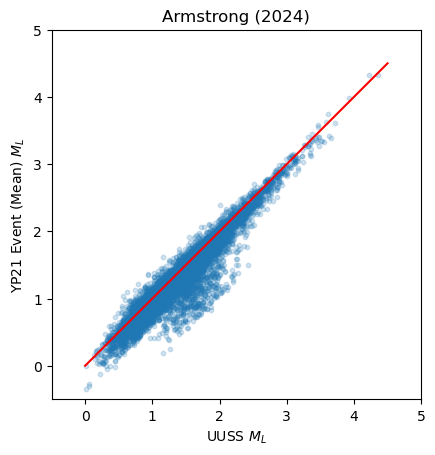

In [58]:
fig, ax = plt.subplots(1)

# My Cat vs UUSS
ax.scatter(ypml_cat['CatMag'], ypml_cat['Event-Mean-YPML-S'], s=10, alpha=0.2)
ax.plot(np.arange(0, 5., 0.5), np.arange(0, 5., 0.5), color='r')
ax.set_xlabel(r'UUSS $M_L$')
ax.set_ylabel(r'YP21 Event (Mean) $M_L$')
ax.set_title("Armstrong (2024)")
ax.set_aspect('equal', adjustable='box')
ax.set_xlim([-0.5, 5])
ax.set_ylim([-0.5, 5])